# Домашнее задание 9

Это домашнее задание по материалам 12го семинара. Дедлайн по отправке - 23:55 5 мая. 

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается мне на почту: __beznosikov.an@phystech.edu__.

Решение каждой задачи необходимо поместить после её условия.

Файл должен называться: Фамилия_Имя_Optimization_HW_9

При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок. 

## Задача 1

Рассмотрим одномерную задачу минимизации:
\begin{equation}
\min_{x \in \mathbb{R}} f(x) = x \arctan x - \frac{1}{2} \log (1 + x^2).
\end{equation}

__(а)__ Реализуйте для этой задачи метод градиентного спуска и метод Ньютона. Нарисуйте графики сходимости данных методов для двух разных точек старта $x^0 = 1.3$ и $x^0 = 1.5$. Сделайте вывод. В общем случае для каких $x^0$ еще есть сходимость метода Ньютона, а для каких она пропадает? Почему?

$f(x) = x \arctan x - \frac{1}{2} \log (1 + x^2)$

$f'(x) = \arctan x + x\frac{1}{1 + x^2} - \frac{1}{1 + x^2} \cdot x = \arctan x$ 

$f'(x) = 0$ при $x=0$

$f''(x) = \frac{1}{1 + x^2}$

$x_{k+1} = x_k - \dfrac{f'(x_k)}{f''(x_k)} = x_k - (1+x_k^2)\arctan x_k$

$|x_{k+1}|>|x_k|$ при $x_k>1.39$ - в этом случае расходится

Соответственно при $x_k<1.39$ и $x_0<1.39$ сходится.

Тогда при 1.5 расходится, при 1.3 сходится

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt
import math 
import time
%matplotlib inline
import scipy.stats
import random

In [2]:
L = 1
M = 0.65
const_1 = lambda k: 1.0

In [3]:
def f(x):
    return x*np.arctan(x)-1/2*np.log(1+x**2)

def grad_f(x):
  return np.arctan(x)

def H_f(x):
  return 1/(1 + x**2)

In [4]:
criterion=[]
def gradient_descent(x_0, learning_rate, iter_number):
    x = x_0
    for k in range(iter_number):
        gr = grad_f(x)
        if(gr == 0.0): return x
        x = x - learning_rate * gr
        
        criterion.append(np.linalg.norm(gr))
    return x

def newton_descent(x_0, step, iter_number):
    x = x_0
    for k in range(iter_number):
        gr = grad_f(x)
        if(gr == 0.0): return x
        x = x -  step(k)*(1/H_f(x))* gr
        
        criterion.append(np.linalg.norm(gr))
    return x

Text(0.5, 0, 'Номер шага')

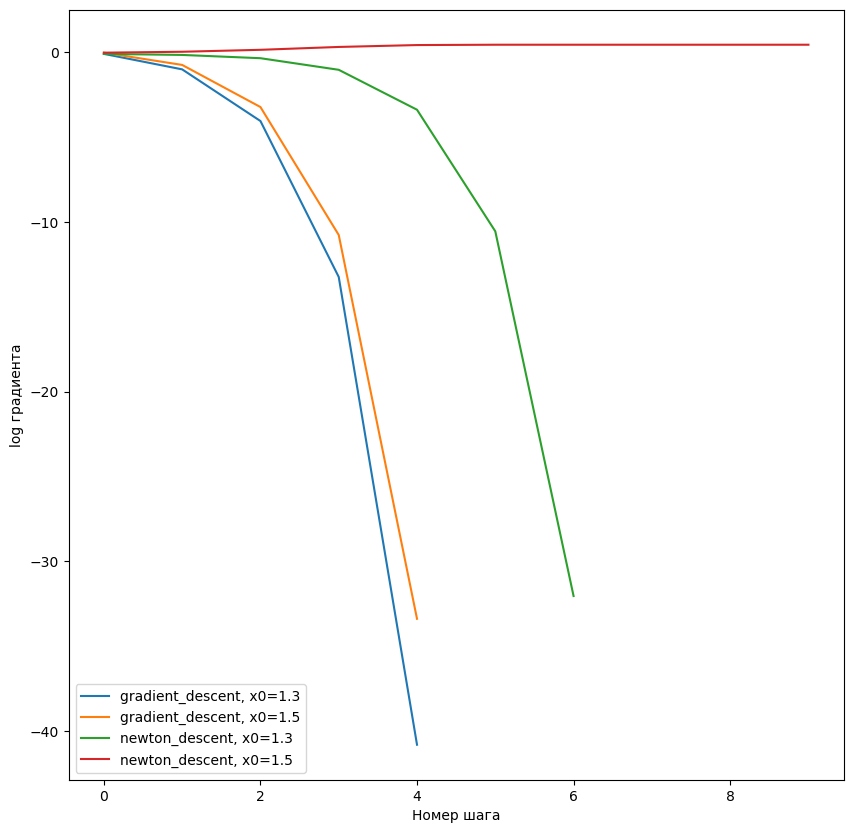

In [5]:
plt.figure(figsize=(10, 10))

iter_number = 10

criterion = []
x = gradient_descent(1.3, 1/L, iter_number)
plt.plot(range(len(criterion)), np.log(criterion),  label = "gradient_descent, x0=1.3")


criterion = []
x = gradient_descent(1.5, 1/L, iter_number)
plt.plot(range(len(criterion)), np.log(criterion),  label = "gradient_descent, x0=1.5")

criterion = []
x = newton_descent(1.3, const_1, iter_number)
plt.plot(range(len(criterion)), np.log(criterion),  label = "newton_descent, x0=1.3")

criterion = []
x = newton_descent(1.5, const_1, iter_number)
plt.plot(range(len(criterion)), np.log(criterion),  label = "newton_descent, x0=1.5")

plt.legend()

plt.ylabel('log градиента')
plt.xlabel('Номер шага')

__(б)__ Реализуйте две модификации метода Ньютона: демпфированный (добавление шага) и кубический метод Ньютона (смотри [статью](https://link.springer.com/article/10.1007/s10107-006-0706-8)). Решают ли эти методы проблему сходимости метода Ньютона для стартовой точки $x^0 = 1.5$? В демпфированном методе попробуйте разные стратегии подбора шага: увеличивающийся, Армихо и другие.

Из теории кубического метода
$x^{k  + 1} = \text{argmin}_{x \in \mathbb{R}}(f(x^k) + <\nabla f(x^k), x - x^k> + \frac{1}{2} <x - x^k, \nabla^2 f(x^k)(x - x^k)> + \frac{M}{6}||x^k - x||^3)$


$x^{k+1} < x^k: x^{k+1} - x^k = \dfrac{f''(x^k) \pm\sqrt{f''(x^k)^2+2Mf'(x^k)}}{M} \Rightarrow x^{k+1} = x^k + \dfrac{f''(x^k) -\sqrt{f''(x^k)^2+2Mf'(x^k)}}{M}$

In [6]:
def newton_descent_Armiho(x_0, a_0, c, iter_number):
    x = x_0
    a = a_0
    for k in range(iter_number):
        gr = grad_f(x)
        H = H_f(x)
        if(gr == 0.0): return x
        while(f(x - a *  gr * 1/H) > f(x) - c * a * gr * 1/H * gr):
            a = a/2
        x = x -  a * 1/H* gr
        
        criterion.append(np.linalg.norm(gr))
    return x

def newton_descent_cube(x_0, iter_number):
    x = x_0
    for k in range(iter_number):
        gr = grad_f(x)
        H = H_f(x)
        if(gr == 0.0): return x
        x = x - 1/M * (np.sqrt(H**2 + 2 * M * gr) - H)
        
        criterion.append(np.linalg.norm(gr))

Text(0.5, 0, 'Номер шага')

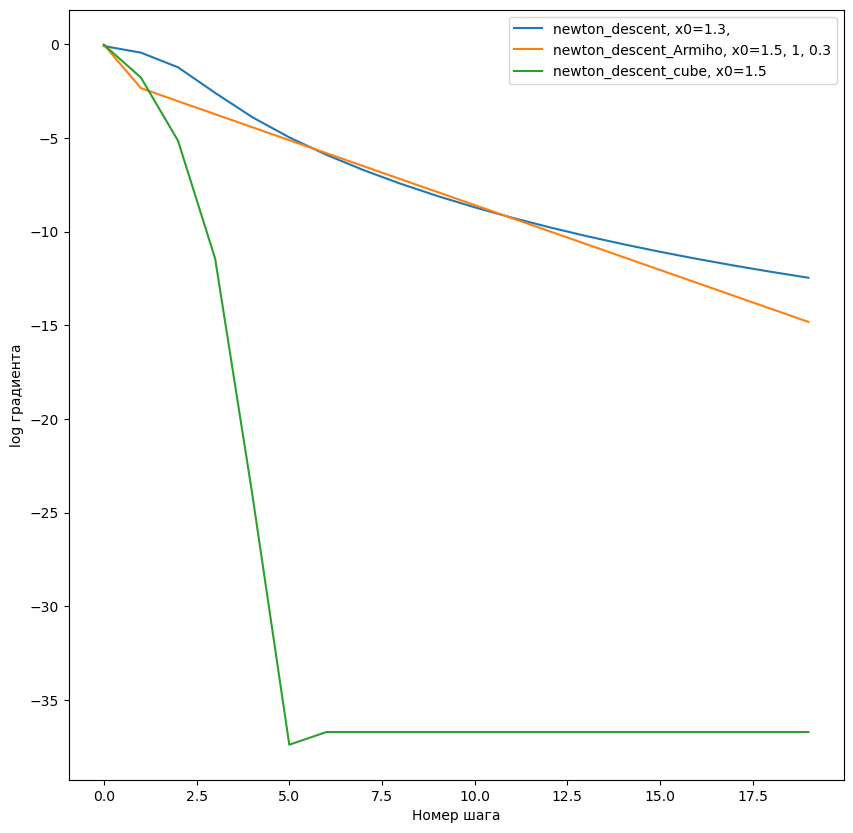

In [7]:
plt.figure(figsize=(10, 10))

iter_number = 20

step = lambda k: 1 * (np.log(k + 2))**0.5

criterion = []
x = newton_descent(1.3, step, iter_number)
plt.plot(range(len(criterion)), np.log(criterion),  label = "newton_descent, x0=1.3, ")

criterion = []
x = newton_descent_Armiho(1.5, 1, 0.3, iter_number)
plt.plot(range(len(criterion)), np.log(criterion),  label = "newton_descent_Armiho, x0=1.5, 1, 0.3")

criterion = []
x = newton_descent_cube(1.5, iter_number)
plt.plot(range(len(criterion)), np.log(criterion),  label = "newton_descent_cube, x0=1.5")

plt.legend()

plt.ylabel('log градиента')
plt.xlabel('Номер шага')

## Задача 2

Вернемся к задаче логистической регресии на датасете _mushrooms_. Добавьте к этой задаче $\ell_2$-регуляризатор с $\lambda = L/100$. 

__(а)__ Для данной задачи реализуйте метод Ньютона и метод градиентного спуска. Попробуйте комбинировать эти два метода, чтобы добиться хорошего решения задачи регрессии, но избежать расходимости метода Ньютона. Как это будете делать? Постройте график сходимости.

В этой задаче быстрее метод Ньютона.

Первые несколько шагов используем градиентный спуск, чтобы спуститься до нужных границ. Далее метод Ньютона.

In [8]:
from sklearn.datasets import load_svmlight_file
import random as rnd

dataset = "mushrooms.txt"
data = load_svmlight_file(dataset)
X, y = data[0].toarray(), data[1]
#y = 2 * y - 3
N, d = X.shape

sum = np.zeros((d, d))
for i in range(N):  sum += np.outer(X[i], X[i].T)
sum = sum/(2 * N)
L = np.real(max(np.linalg.eigvals(sum)))

print(N,d, L)

8124 112 5.172428467808865


In [9]:
#def f(w):#старое
#    return 1/N*(np.linalg.norm(X@w - y))**2 + L/100 * (np.linalg.norm(w))**2

#def grad_f(w):
#    grdf = np.zeros(len(w))
#    for i in range(len(X_train)):
#        grdf = grdf + y_train[i] * X_train[i] / (1 + np.exp(y_train[i] * np.dot(X_train[i], w)))
#    return (- grdf / len(X_train) + 10 / 100 * w)

#def H_f(w):#старое
#  return (2*(X.T@X))/N + L/50 * np.eye(d)

def f(w):
  sum = 0
  for i in range(N):
    sum += np.log(1 + np.exp(-w.T@X[i] * y[i]))
  return sum/N + L/100 * np.linalg.norm(w)**2


def grad_f(w):
  sum = np.zeros(X.shape[1])
  for i in range(N):
    e = np.exp(-w.T@X[i]*y[i])
    sum += e/(1 + e) * X[i] * y[i]
  return -sum/N + L/50 * w

def H_f(w):
  sum = np.zeros((X.shape[1], X.shape[1]))
  for i in range(N):
    e = np.exp(-w.T@X[i]*y[i])
    sum += e/((1 + e)**2) * np.outer(X[i], X[i].T)
  return sum/N + L/50 * np.eye(X.shape[1])




In [10]:
def custom_descent(x_0, iter_number):
    x = x_0
    for k in range(iter_number):
        gr = grad_f(x)
        
        if(np.log(np.linalg.norm(gr)) < 2):
            x = x -  np.linalg.inv(H_f(x))@gr
        else:
            x = x- 1/L*gr
        criterion.append(np.linalg.norm(gr))
    return x
    

Text(0.5, 0, 'Номер шага')

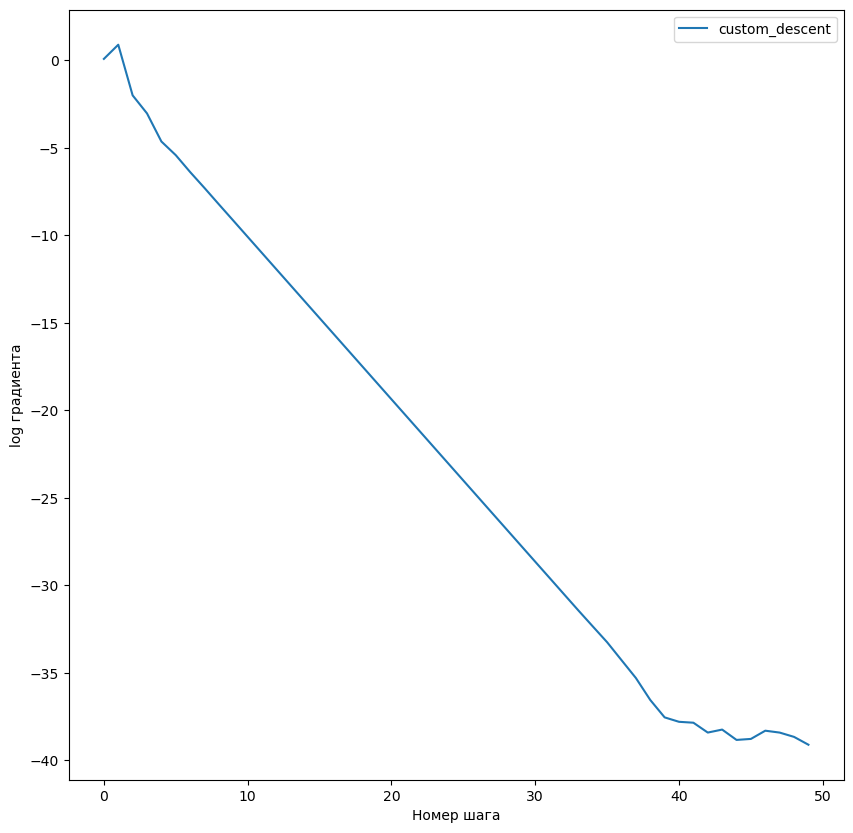

In [11]:
plt.figure(figsize=(10, 10))

iter_number = 50

step = lambda k: 1 * (np.log(k + 2))**0.5

criterion = []
x = custom_descent(np.ones(d), iter_number)
plt.plot(range(len(criterion)), np.log(criterion),  label = "custom_descent")

plt.legend()

plt.ylabel('log градиента')
plt.xlabel('Номер шага')

__(б)__ Для данной задачи реализуйте квазиньютоновские методы: Бройдена, DFP, BFGS (смотри Главу 6 из [книги](https://www.csie.ntu.edu.tw/~r97002/temp/num_optimization.pdf), а особенности реализации можно посмотреть [здесь](https://github.com/scipy/scipy/blob/v0.18.1/scipy/optimize/optimize.py#L874-L976)), L-BFGS (смотри [статью](http://users.iems.northwestern.edu/~nocedal/PDFfiles/limited-memory.pdf)). Решите с помощью них задачу регресии. Постйроте графики сходимости и изменения accuracy. Сделайте вывод.

In [27]:
criterion = []
accuracy = []

def Broyden(x_0, iter_number):
    x = x_0
    H = H_f(x)
    gr = grad_f(x)
    
    gr1 = gr
    x1 = x
    
    for i in range(iter_number):
        x1 = x1 - H @ gr1
        dx = x1 - x
        gr1 = grad_f(x1)
        
        y_ = gr1 - gr
        H = H + (1/((dx - H@y_).T @ y_)) * np.outer((dx - H@y_), (dx - H@y_).T)
        
        gr = gr1
        x = x1
        
        criterion.append(np.linalg.norm(gr))
        accuracy.append(list(np.round(X@x) - y).count(0)/len(y))
    return(x)
        
        
        
def DFP(x_0, iter_number):
    x = x_0
    H = H_f(x)
    gr = grad_f(x)
    
    x1 = x
    gr1 = gr
    
    for i in range(iter_number):
        x1 = x1 - H @ gr1
        s = x1 - x

        gr1 = grad_f(x1)
        y_ = gr1 - gr
        H = H + 1/(s.T@y_)*np.outer(x1 - x, (x1 - x).T) - 1/((H@y_).T@y_) * np.outer(H@y_, (H@y_).T)
        
        gr = gr1
        x = x1
        
        criterion.append(np.linalg.norm(gr1))
        accuracy.append(list(np.round(X@x) - y).count(0)/len(y))
    return(x)
    
       
    
    

def BFGS(x_0, lr, c1, c2, iter_number):
    x=x_0
    H = H_f(x)
    gr = grad_f(x)
    
    for i in range(iter_number):
        p = -H @ gr
        while(not ((f(x + lr*p) <= f(x) + c1*lr*gr.T@p) or (grad_f(x + lr*p).T@p >= c2*gr.T@p))):
            lr = lr/2
            
        x_prev = x
        x = x + lr*p
        s = x - x_prev
        if(np.linalg.norm(s)==0): return x
        gr_prev = gr
        gr = grad_f(x)
        y1 = gr - gr_prev
        rho = 1/(y1.T @ s)
        I = np.eye(H.shape[0])
        H = (I - rho*np.outer(s, y1.T))@H@(I - rho*np.outer(y1, s.T)) + rho*np.outer(s, s.T)
        
        criterion.append(np.linalg.norm(gr))
        accuracy.append(list(np.round(X@x) - y).count(0)/len(y))
        
    return(x)



def L_BFGS(x_0, lr, c1, c2, m, iter_number):
    x = x_0
    hess0 = H_f(x)
    hess = hess0
    gr = grad_f(x)
    s_arr = []
    y1_arr = []
    rho_arr = []
    
    for i in range(iter_number):
        p = -hess @ gr
        while(not ((f(x + lr*p) <= f(x) + c1*lr*gr.T@p) or (grad_f(x + lr*p).T@p >= c2*gr.T@p))):
            lr = lr/2
            
        x_prev = x
        x = x + lr*p
        s = x - x_prev
        s_arr.append(s)
        if (len(s_arr) > m):
            s_arr.pop(0)
        gr_prev = gr
        gr = grad_f(x)
        y1 = gr - gr_prev
        y1_arr.append(y1)
        if (len(y1_arr) > m):
            y1_arr.pop(0)
        rho = 1/(y1.T @ s)
        rho_arr.append(rho)
        if (len(rho_arr) > m):
            rho_arr.pop(0)
            
        hess1 = hess0
        I = np.eye(hess.shape[0])
        m1 = min(i + 1, m)
        mult  = np.eye(hess.shape[0])
        for j in range(m1):
            V = (I - rho_arr[j] * np.outer(y1_arr[j], s_arr[j].T))
            mult = mult @ V
        hess1 = mult.T@hess1@mult
        
        for j in range(1, m1):
            cur = rho_arr[j - 1] * np.outer(s_arr[j - 1], s_arr[j - 1].T)
            mult  = np.eye(hess.shape[0])
            for k in range(j, m1):
                V = (I - rho_arr[k] * np.outer(y1_arr[k], s_arr[k].T))
                mult = mult @ V
            cur = mult.T@cur@mult
            hess1 = hess1 + cur
    
        hess = hess1 + rho_arr[m1 - 1]*np.outer(s_arr[m1 - 1], s_arr[m1 - 1].T)
        
        criterion.append(np.linalg.norm(gr))
        accuracy.append(list(np.round(X@x) - y).count(0)/len(y)) 
    return(x)   

Text(0.5, 0, 'Номер шага')

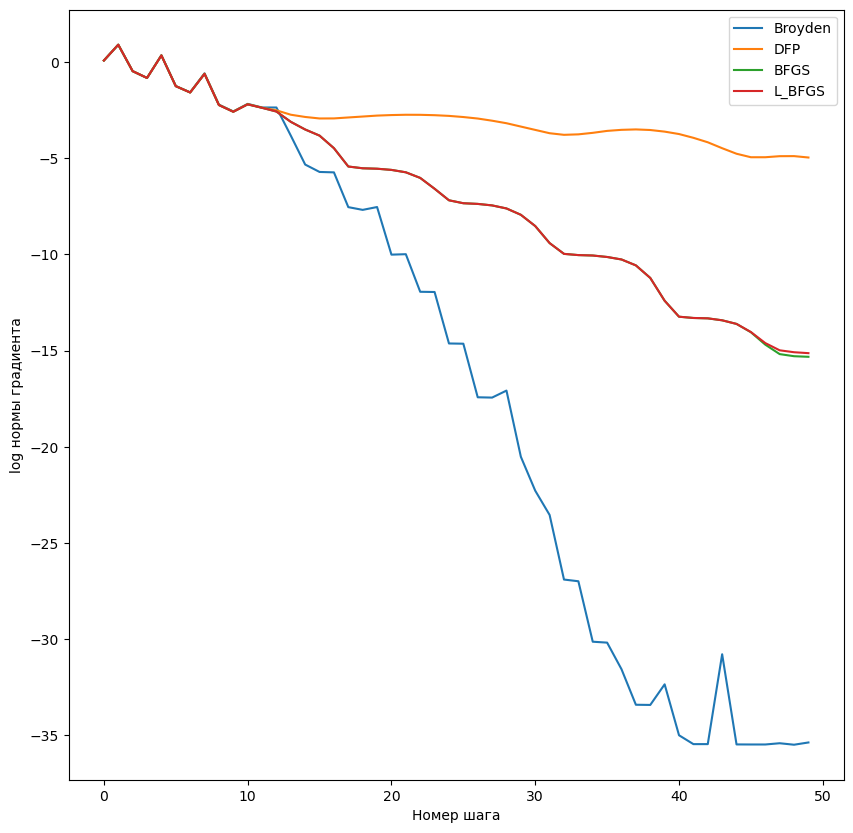

In [35]:
plt.figure(figsize=(10, 10))

iter_number = 50

criterion = []
x = Broyden(np.ones(d), iter_number)
plt.plot(range(len(criterion)), np.log(criterion),  label = "Broyden")

criterion = []
x = DFP(np.ones(d), iter_number)
plt.plot(range(len(criterion)), np.log(criterion),  label = "DFP")

criterion = []
x = BFGS(np.ones(d), 1, 0.15, 0.25, iter_number)
plt.plot(range(len(criterion)), np.log(criterion),  label = "BFGS")

criterion = []
x = L_BFGS(np.ones(d), 1, 0.15, 0.25, 22, iter_number)
plt.plot(range(len(criterion)), np.log(criterion),  label = "L_BFGS")

plt.legend()

plt.ylabel('log нормы градиента')
plt.xlabel('Номер шага')

Text(0.5, 0, 'Номер шага')

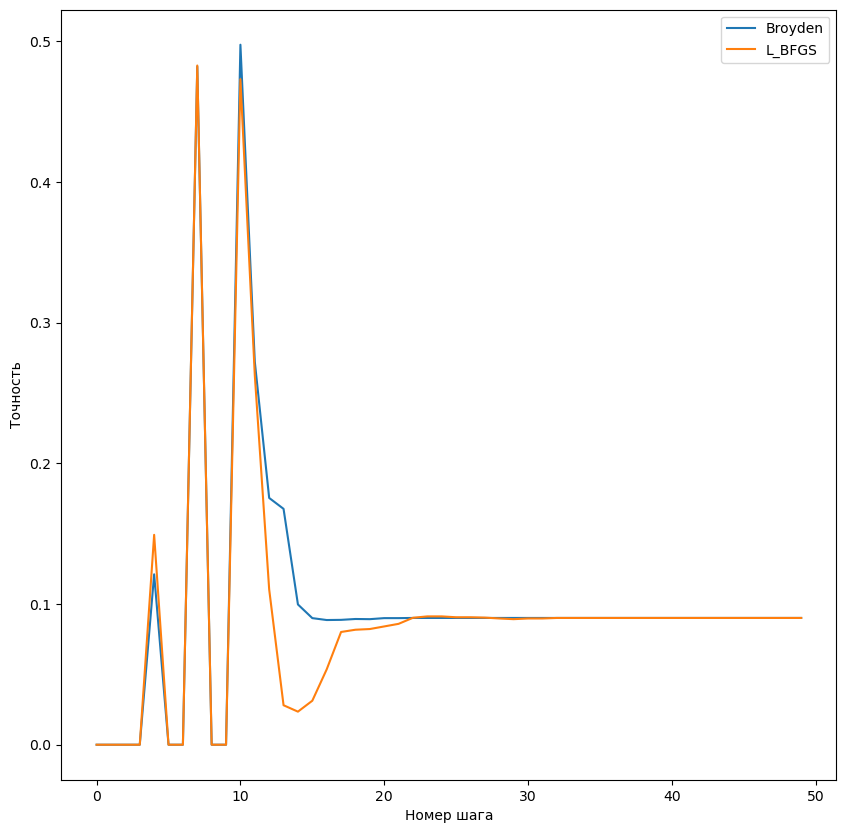

In [37]:
plt.figure(figsize=(10, 10))

iter_number = 50

accuracy = []
x = Broyden(np.ones(d), iter_number)
plt.plot(range(len(accuracy)), accuracy,  label = "Broyden")

accuracy = []
#x = DFP(np.ones(d), iter_number)
#plt.plot(range(len(accuracy)), accuracy,  label = "DFP")

accuracy = []
#x = BFGS(np.ones(d), 1, 0.15, 0.25, iter_number)
#plt.plot(range(len(accuracy)), accuracy,  label = "BFGS")

accuracy = []
x = L_BFGS(np.ones(d), 1, 0.15, 0.25, 30, iter_number)
plt.plot(range(len(accuracy)), accuracy,  label = "L_BFGS")

plt.legend()

plt.ylabel('Точность')
plt.xlabel('Номер шага')

__Бонусные пункты__

__(в)__ Реализуйте подход из [работы](https://pages.cs.wisc.edu/~swright/726/handouts/barzilai-borwein.pdf). С помощью них решите задачу регресии. Сравните их работу с квазиньютоновскими методами. Сделайте вывод.

In [15]:
#ответ

__(г)__ Реализуйте методы Newton-Learn и Cubic-Newton-Learn из [работы](https://proceedings.mlr.press/v139/islamov21a.html). С помощью них решите задачу регресии. Сравните их работу с квазиньютоновскими методами. Какой критерий сравнения будете использовать? 

In [16]:
#ответ